# MPA-MLF, Lab 5 - Feedforward Neural Networks

These exercises are focused on dealing with neural networks. It is strongly recommended to use google collab for these pc labs. Why? Google collab offers a free GPU capacity to train machine learning models. Training NN on GPU can drastically speed up the training process. You can turn on the GPU accelerator in: Runtime -> Change runtime type -> GPU,

## The basic terminology

### Neural Networks

Think of a neural network as a complex web of neurons (or nodes) that are interconnected to process information, similar to how the human brain works. Each neuron in this network can receive inputs, process them, and pass on the output to other neurons. The goal of a neural network is to transform the inputs (e.g., images, texts, numbers) into a desired output (e.g., identifying what's in an image, translating text, etc.).

![title](img/network.png)

### Layers

A neural network is made up of layers: the input layer (where the data enters the network), one or more hidden layers (where most of the processing happens), and the output layer (where the final prediction is made). You can think of each layer as a filter that increasingly refines the information as it passes through the network. In our case, we will discuss feedforward, fully-connected neural networks. Fully connected means that every neuron in layer *n* is connected by a weighted connection with all neurons in the layers *n+1*. Feedforward means that data are passed in one direction only, there are no reccurent connections (feedback loops) exist.

![title](img/Neural_network.png)

### Neuron

A neuron, or node, is the basic unit of a neural network. It receives input, applies a weight (significance) to that input, adds a bias (a constant value to ensure the neuron activates correctly), and then uses an activation function to determine whether and how strongly to pass its signal to the next layer. Each neuron contributes to the network's ability to make accurate predictions or decisions.|

![title](img/neuron.png)

### Neuron in the input layer

In the input layer the input neurons are composed of identity only, that means everying that comes to the input comes directly to the output

### Training

Training a neural network involves feeding it with data for which the correct output is known, allowing the network to adjust its weights and biases to minimize the difference between its predictions and the actual truths. This process is repeated numerous times with many data examples.

### Loss Function

A loss function measures how well the neural network is performing, meaning how close or far its predictions are from the actual values. The goal of training is to minimize this loss, or error, making the network's predictions as accurate as possible.

## Exercise 1 - XOR problem

During the last lecture, we saw that the single perceptron model with a step function could be used only for solving linearly-separable classification problems. Because of that, a single perceptron can not be trained to be able to behave like an XOR gate. To approximate the XOR gate using a neural network, we need to use the following structure:

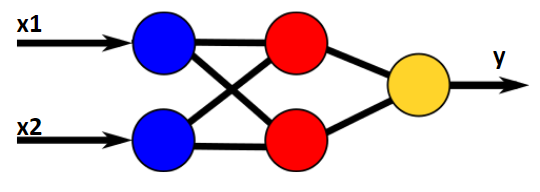

The above structure contains three layers: two neurons in the input layer (blue), two in the hidden layer and one in the output layer (yellow). The input layer represents the identity functions (the outputs are equal to the inputs)

We will use *Keras* API to build and train our neural network. Keras is an open-source neural network library written in Python. It is designed to enable fast experimentation with deep neural networks and provides a high-level API for building and training neural networks.

### 0. First import libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### 1. prepare data

In this part, the task would be to prepade our dataset, basically it is the logic table for *XOR* function

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

### 2. Creating the model

To create a model of NN that is in the picture above, run the following cell

In [ ]:
model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Sequential** is a model type used in Keras for building feedforward neural networks. It is called "sequential" because the layers are stacked sequentially on top of each other, and the output of one layer is passed as input to the next layer.

To create a sequential model, instantiate a Sequential object and then add layers to it using the **add()** method. There are many layers that Keras offers. We will use *Dense layer*

**Dense layer** represents a fully connected layer, which means that every neuron in the layer is connected to every neuron in the previous layer. In each layer, we will specify an activation function and the number of neurons that layer contains. The input layer is not defined as a dense layer, but instead of that, we will specify the *input_dim* parameter in the layer that follows the input layer. *input_dim* parameter specifies the number of neurons in the input layer

### 3. Compile the model

To compile yor model run:

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**keras.complile()** is used to configure the learning process before training the model.
We need to specify 3 parameters:
- *loss*, *optimizer* and *metrics*

- as our loss function (error function/objective function), we will choose *binary_crossentropy* - loss function often used for binary classification

- *optimizer* is optimization algorithm used for optimizing weights in our training process, we will choose *stochastic gradient descent*

- *metrics* is metric user for model evaluation


### 4. Model training

In the lecture, we talked about training the Multi-layer perceptron. The training process consists of the following steps:

1. Weight initialization
2. Forward Propagation
3. Compute Loss
4. Backpropagation
5. Update Weights
6. Repeat 2->6 until maximum epochs are reached

When training a machine learning model, the training data is usually divided into batches (parts), and the model updates its weights after processing each batch. The batch size determines how many training examples are included in each batch.

For example, we have 10,000 training examples and a batch size of 100. In this case, the training data would be divided into 100 batches of 100 examples each. During training, the model would process each batch, calculate the loss or error, and update its weights based on the average of the errors in that batch. In other words, if we batch equal to 1. we will update the weights 10 000 times. If we have batch size == 100, we will update the weights only 100 times

To train your model, run the following line of the code:

In [ ]:
history = model.fit(X, y, epochs=2000, batch_size=1, verbose=0)

the method **.fit()**, is used to train the model. We can see that it takes several input parameters:
 - *X* - input data
 - *y* - label for the input data
 - *epochs* number of training epochs (iterations)
 - *batch_size* - number of samples in each batch
 - *verbose* - set verbose parameter to see the progress of loss and metrics during the training epochs

These are not the only parameters the .fit() method can take. Check official documentation: https://keras.io/api/models/model_training_apis/

We will set the output of our .fit() function to variable *history*, where the loss and other metrics defined above in the .compile() function during the training are saved.

### 5. Model evaluation

Out training process is finished. To evaluate the performance of our model on test data, tun the following cell of the code:

In [ ]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 100.00


### 6. Model predictions

In [ ]:
for id_x, data_sample in enumerate(X):
  prediction = model.predict(np.array([data_sample]))
  print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Data sample is [0 0], prediction from model [[0.02346191]], ground_truth 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Data sample is [0 1], prediction from model [[0.9674932]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Data sample is [1 0], prediction from model [[0.96749943]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Data sample is [1 1], prediction from model [[0.03099912]], ground_truth 0


### 7. Display loss function during the training process and acuracy

Text(0, 0.5, 'loss')

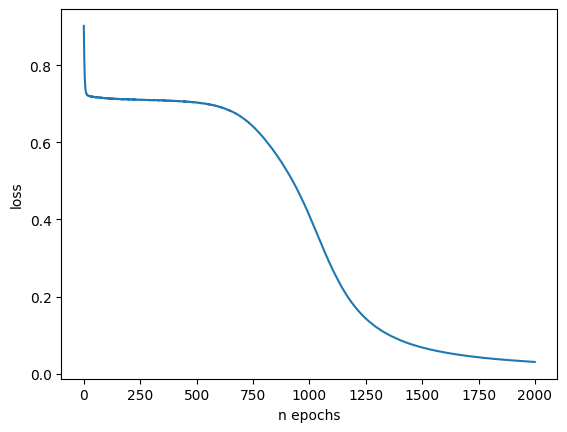

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

### TASK:

In this part of the exercise, the task would be to play around with the code above to see the influence of hyperparameters.

As we know from the lecture, neural networks contain two types of parameters:
  1. **Learnable parameters** - *weights* and *biases*. these parameters are adjusted in the training process.  
  2. **Non-learnable parameters (hyperparameters)** - learning_rate, number_of_neurons, number_of_layers, number_of_epochs, type of activation functions in the neurons.., basically any user-defined setting is considered to be hyperparameter


Change the following parameters:
- number of epochs
- learning_rate
- activation functions in layers,
- batch_size,
- verbose,
- number of neurons in the hidden layer

Moreover, see the influence on the training process and results.

**Note: Every time we change some hyper-parameters, do not forget to compile the model, to initialize the learnable parameters again**

## Exercise 2 - Congressional Voting Data

In the attached dataset, results from congressional voting can be found. Your task is to train a model that can recognize that the politician is *republican* or *democrat* based on voting results. We would follow the general machine learning steps that were described in the lecture.

In [19]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Loading dataset

**First mount your google drive to google colab file.**

In [4]:
path_to_dataset = '/content/drive/My Drive/Colab Notebooks/Lab_05/voting_complete.csv'
pd_dataset = pd.read_csv(path_to_dataset)

In [5]:
pd_dataset

,Unnamed: 0,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


### 2. Train/Test Split

Fistlty we need to split our dataset into train and test. We will use 80% of dataset as our trainset and 20% od dataset as our testset. You can use functions included in *keras*, *scikit-learn*, or you can write your own:

In [ ]:
# define a function for train and test split

def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()

    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]


In [ ]:
x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

### 3. Data examination

The task would be to examine the dataset. Check:

In [ ]:
x_train

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,y,n,y,n,?,n,y,y,y,y,n,y,n,?,y,y
344,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
345,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
346,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [ ]:
x_train.nunique()

,0
handicapped-infants,3
water-project-cost-sharing,3
adoption-of-the-budget-resolution,3
physician-fee-freeze,3
el-salvador-aid,3
religious-groups-in-schools,3
anti-satellite-test-ban,3
aid-to-nicaraguan-contras,3
mx-missile,3
immigration,3


1. Is it a classification or regression task?  
This is a classification task. Logistic regression can be used to solve it. Because the dataset's target variable contains categorical values.

In [ ]:
x_train.shape[0]

348

2. How many data samples do we have?  
Number of data samples: 348

In [ ]:
x_train.shape[1]

16

3. How many features do we have?  
Number of features: 16  

In [ ]:
x_train.dtypes

,0
handicapped-infants,object
water-project-cost-sharing,object
adoption-of-the-budget-resolution,object
physician-fee-freeze,object
el-salvador-aid,object
religious-groups-in-schools,object
anti-satellite-test-ban,object
aid-to-nicaraguan-contras,object
mx-missile,object
immigration,object


4. What data types do we have in our dataset?  
All columns in the dataset are of type "object" categorical.

In [ ]:
x_train.isnull().sum()

,0
handicapped-infants,0
water-project-cost-sharing,0
adoption-of-the-budget-resolution,0
physician-fee-freeze,0
el-salvador-aid,0
religious-groups-in-schools,0
anti-satellite-test-ban,0
aid-to-nicaraguan-contras,0
mx-missile,0
immigration,0


In [ ]:
(x_train == "?").sum()

,0
handicapped-infants,12
water-project-cost-sharing,38
adoption-of-the-budget-resolution,10
physician-fee-freeze,9
el-salvador-aid,12
religious-groups-in-schools,8
anti-satellite-test-ban,11
aid-to-nicaraguan-contras,13
mx-missile,18
immigration,7


5. Are there any missing values?  
No but there are "?" values ​​in the dataset.

In [ ]:
y_train.nunique()

2

6. How many labels do we have?  
2

### 4. Data preprocessing

When you preprocess your traing data, do not forget that you need to apply the same preprocessing also for your test set. For example: If you decide to delete some columns in your train set, you have to delete the same columns in your test set.

Possible preprocessing steps (try several and see the influence of your preprocessing on your results)
 - Replace missing values with any data imputation technique ( for example, the most occurring value in the column), then perform one-hot encoding or label encoding of your data
 - Consider the missing value to be the third category 'unknown' and then perform one-hot encoding or label encoding

The target value also has to be encoded. This can be done by one-hot encoding or label encoding.

In [7]:
clean_df = pd_dataset.drop(['Unnamed: 0'], axis='columns')

Let's see how many missing values ​​are in the dataset:

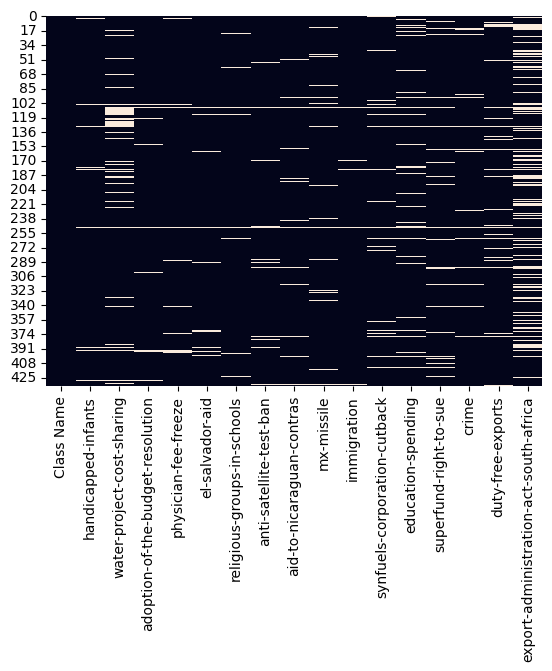

In [ ]:
sns.heatmap(clean_df == "?", cbar=False)
plt.show()

Note: Black color indicates the presence of values "y" or "n", and white color indicates the absence of values "?".


In percentage per column:

In [ ]:
(clean_df == "?").sum().sort_values(ascending=False) * 100 / clean_df.shape[0]

,0
export-administration-act-south-africa,23.908046
water-project-cost-sharing,11.034483
education-spending,7.126437
duty-free-exports,6.436782
superfund-right-to-sue,5.747126
mx-missile,5.057471
synfuels-corporation-cutback,4.827586
crime,3.908046
el-salvador-aid,3.448276
aid-to-nicaraguan-contras,3.448276


Class distribution:

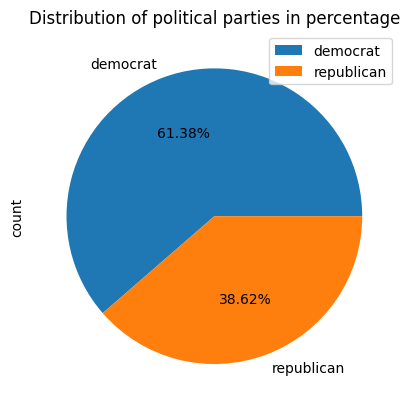

In [ ]:
clean_df['Class Name'].value_counts().plot.pie(autopct= lambda x:f"{round(x, 2)}%")
plt.legend()
plt.title("Distribution of political parties in percentage")
plt.show()

Distribution of votes by political party:

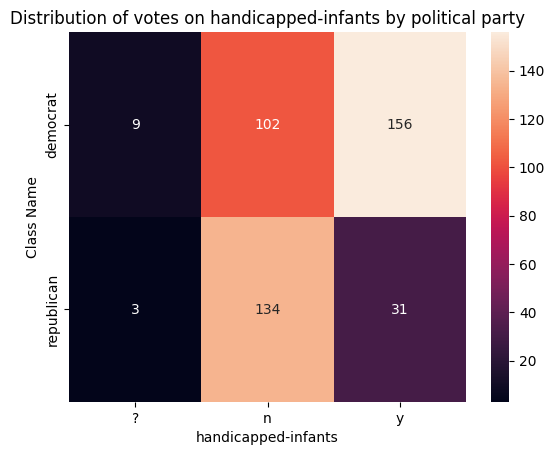

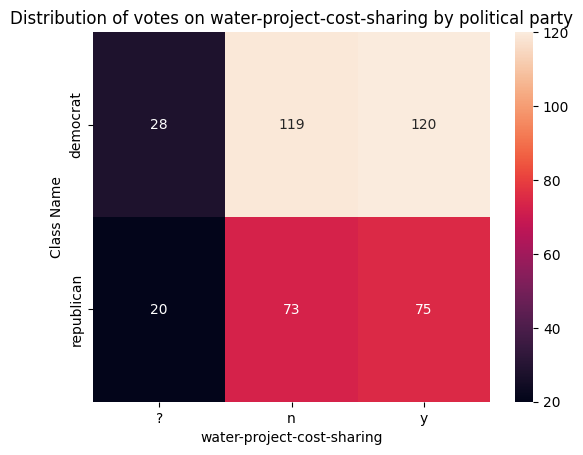

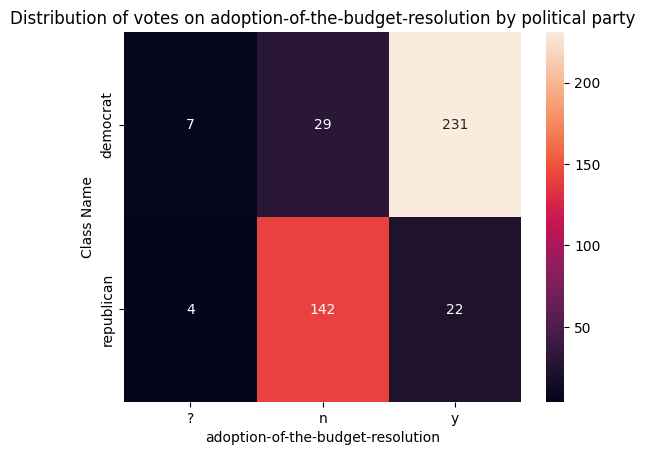

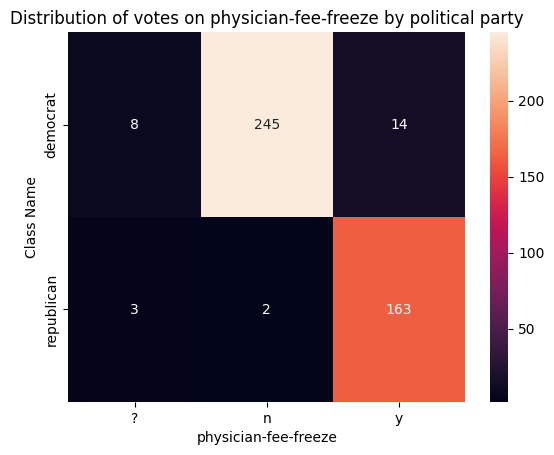

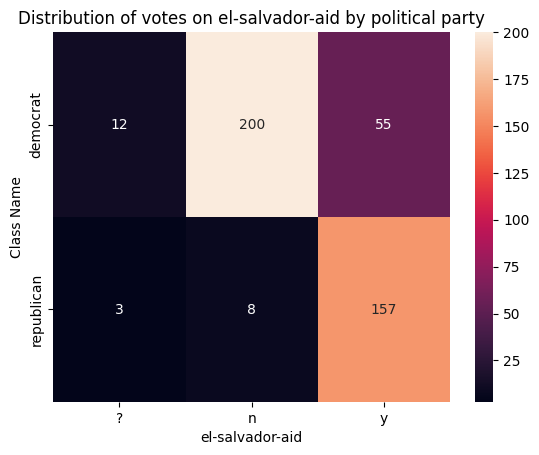

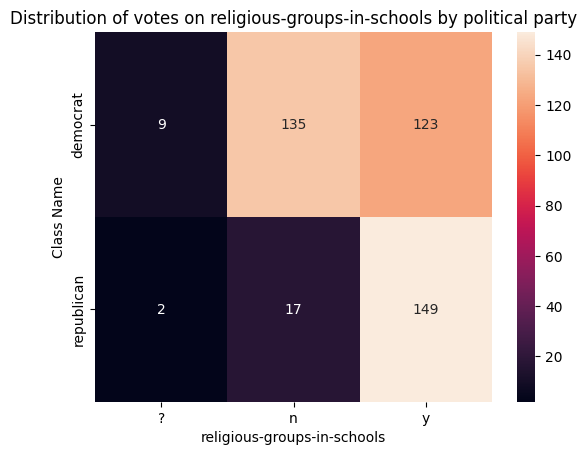

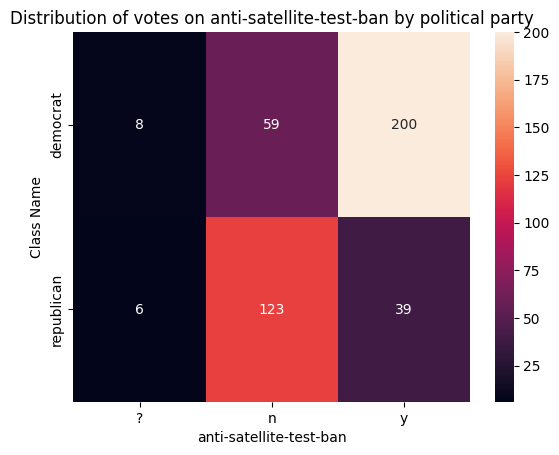

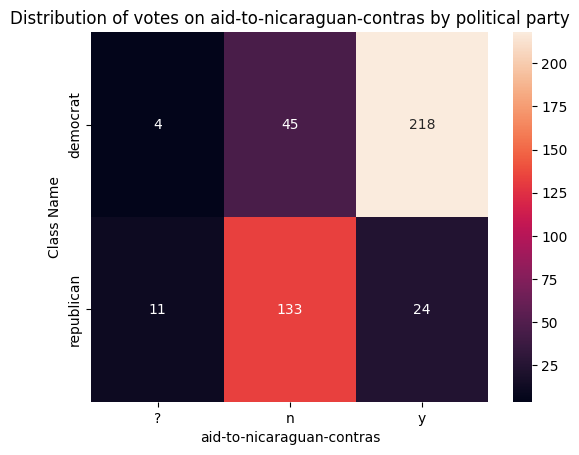

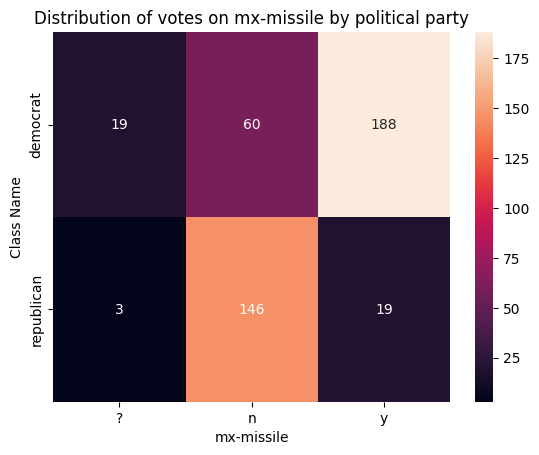

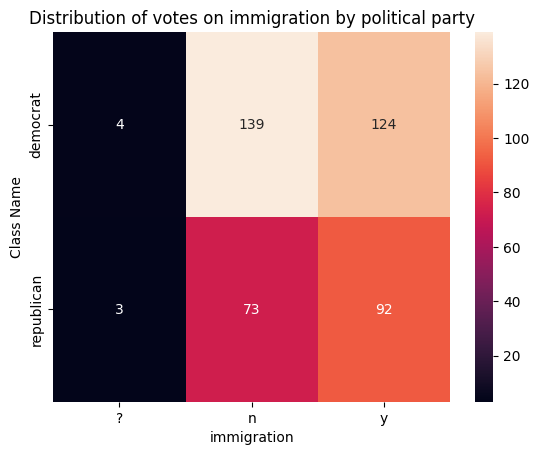

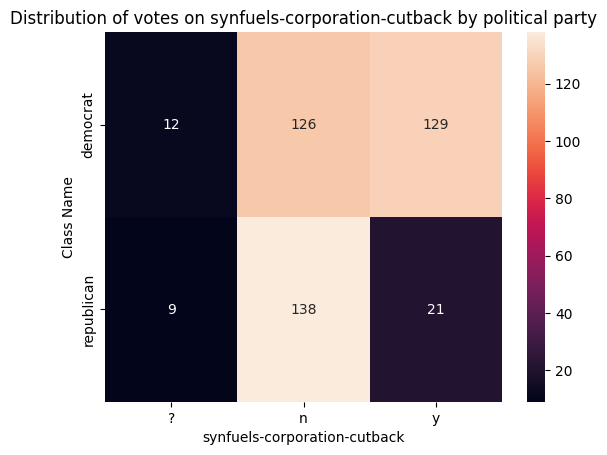

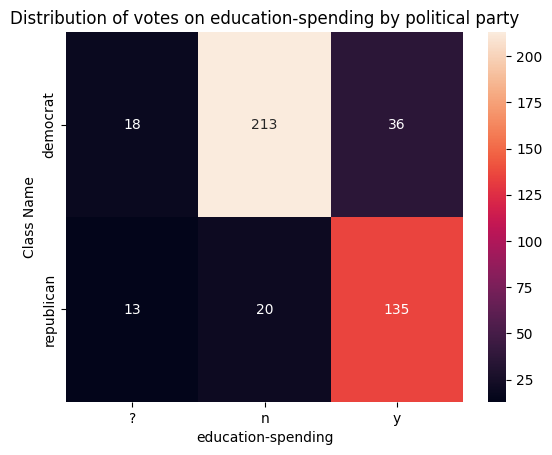

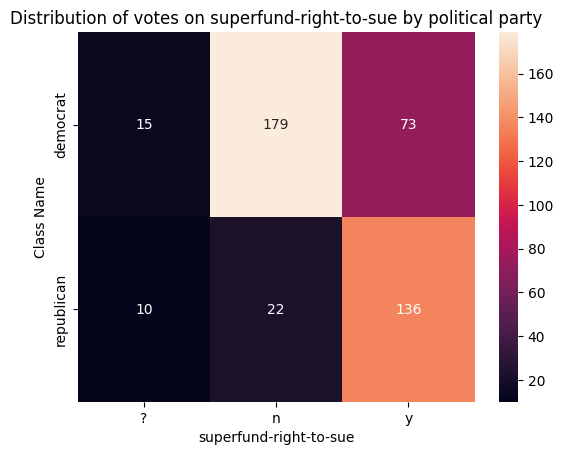

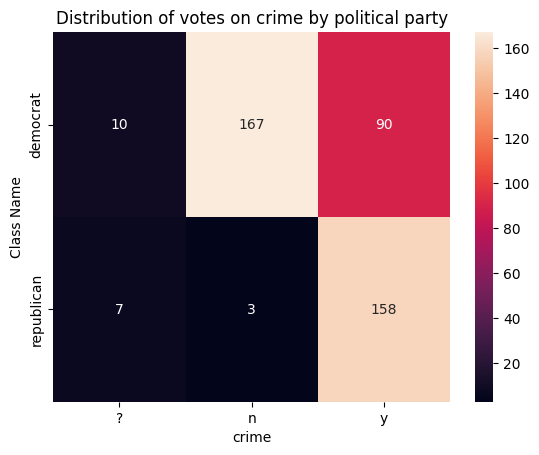

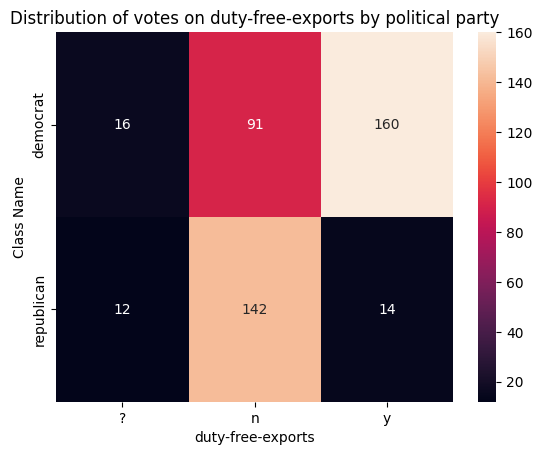

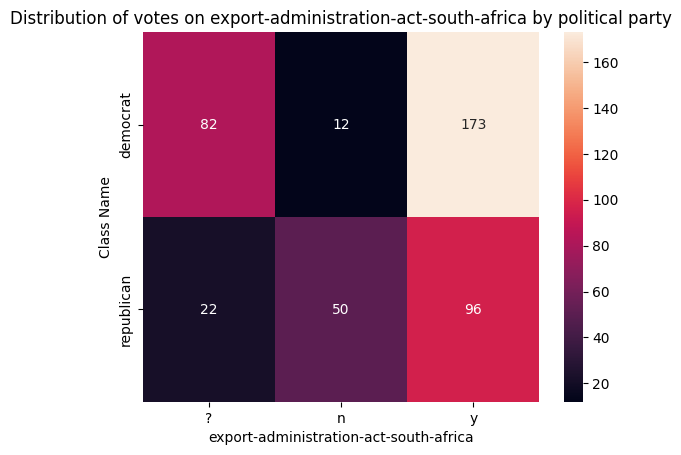

In [ ]:
for column in clean_df.columns:
  if column == 'Class Name':
    continue

  sns.heatmap(pd.crosstab(clean_df['Class Name'], clean_df[column]), annot=True, fmt='d')
  plt.title(f"Distribution of votes on {column} by political party")
  plt.show()
  print()

Let's try to fill in the missing values ​​data using a model (Random Forest for example):

let's first delete the rows that have too many missing values ​​(arbitrarily, I decided to set the limit to 5 missing values ​​per row)

In [8]:
clean_df = clean_df[(clean_df == "?").sum(axis='columns') < 6]

Let's use label encoder to encode the classes and about the features let's replace "y": 1 and "n": 0 and "?": NaN (I preferred to do it directly manually to fix this logic)

In [9]:
columns_to_map = clean_df.columns.difference(["Class Name"])
clean_df[columns_to_map] = clean_df[columns_to_map].map(lambda x: 1 if x == "y" else (0 if x == "n" else np.nan))
label_encoder = LabelEncoder()
clean_df['Class Name'] = label_encoder.fit_transform(clean_df['Class Name'])

Let's gradually fill in the missing values ​​with the rows that have 1 missing value until those that have the most. And each time the filled rows become available data to train the new model:

In [10]:
for missing_count in range(1, clean_df.isna().sum(axis=1).max() + 1):
    complete_clean_df = clean_df.dropna()
    incomplete_clean_df = clean_df[clean_df.isna().sum(axis='columns') == missing_count]

    for column in incomplete_clean_df.columns:
        if column == 'Class Name':
            continue

        rows_to_predict = incomplete_clean_df[incomplete_clean_df[column].isna()]

        X_train = complete_clean_df.drop(columns=[column])
        y_train = complete_clean_df[column]
        X_test = rows_to_predict.drop(columns=[column])

        if X_test.empty:
            continue

        rf = RandomForestClassifier(n_estimators=100, random_state=8)
        rf.fit(X_train, y_train)
        #print(rf.score(X_train, y_train))

        y_pred = rf.predict(X_test)


        clean_df.loc[X_test.index, column] = y_pred


Let's look again at the distribution of votes by political party:

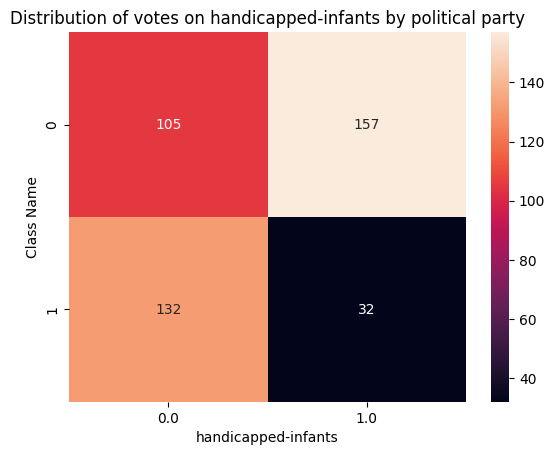

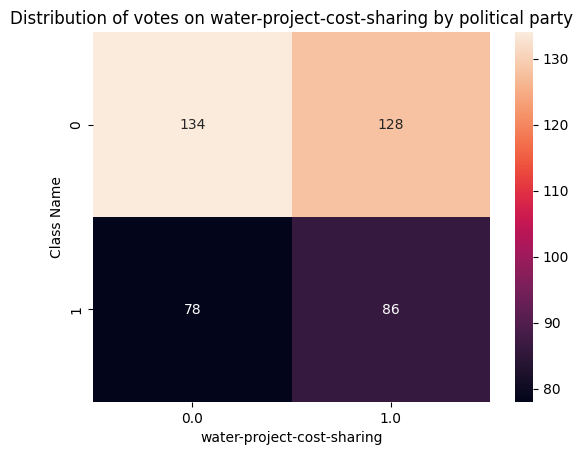

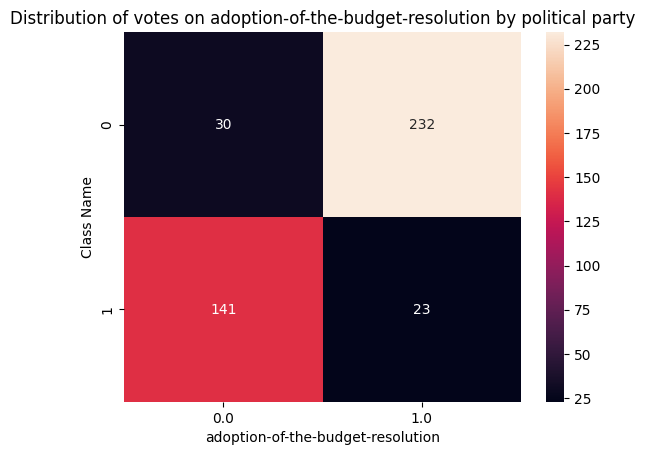

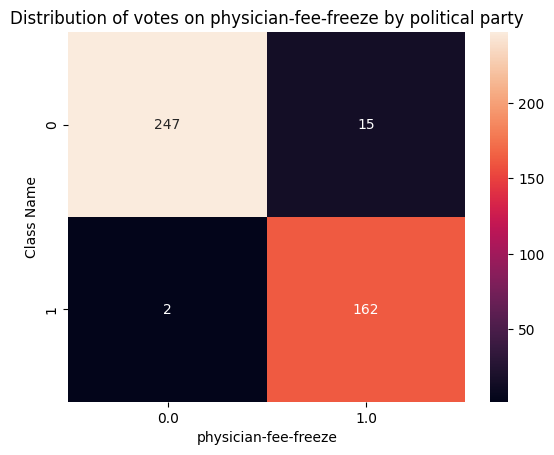

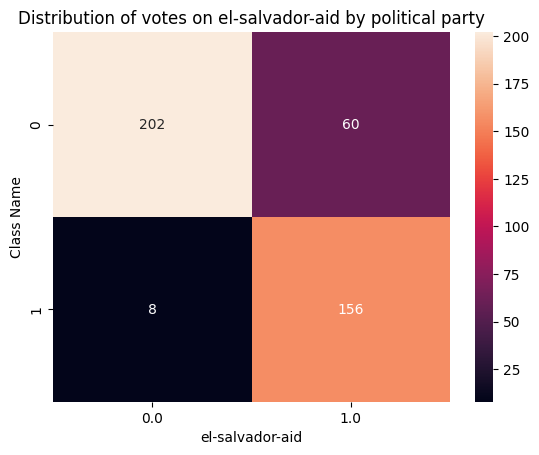

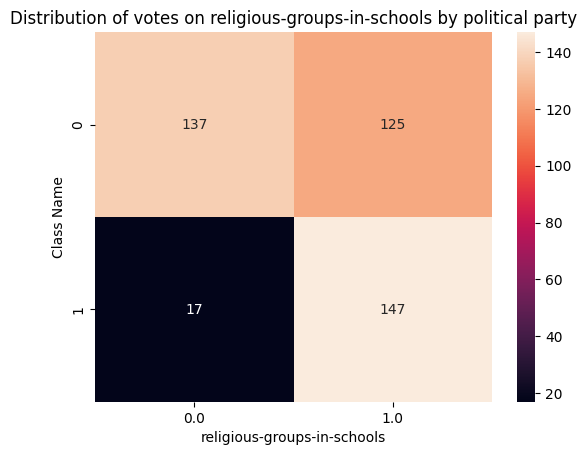

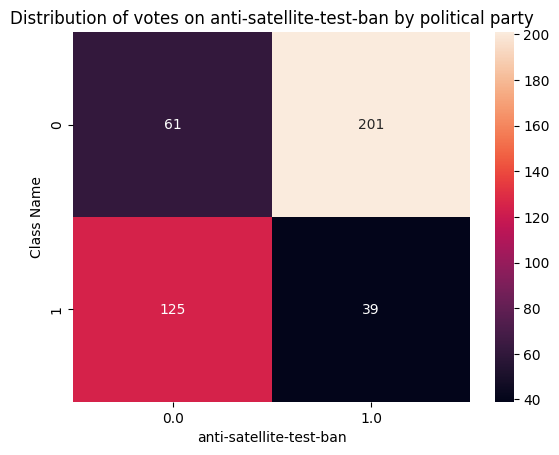

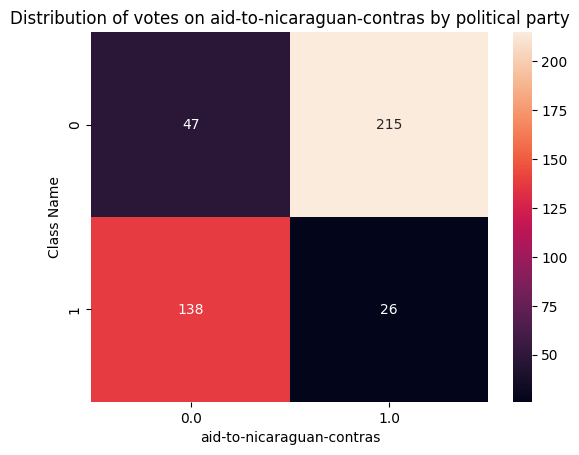

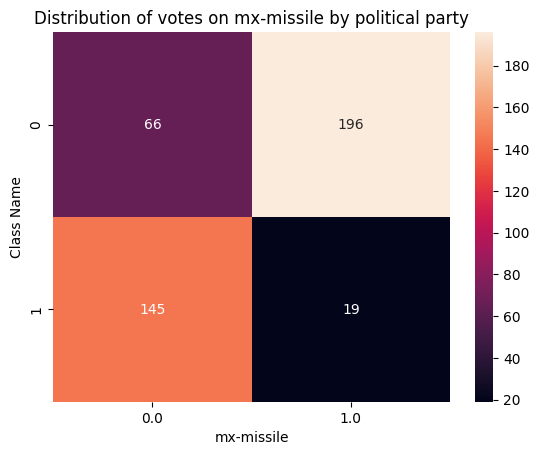

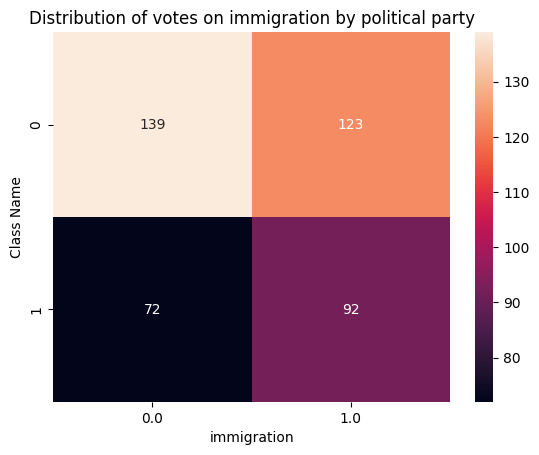

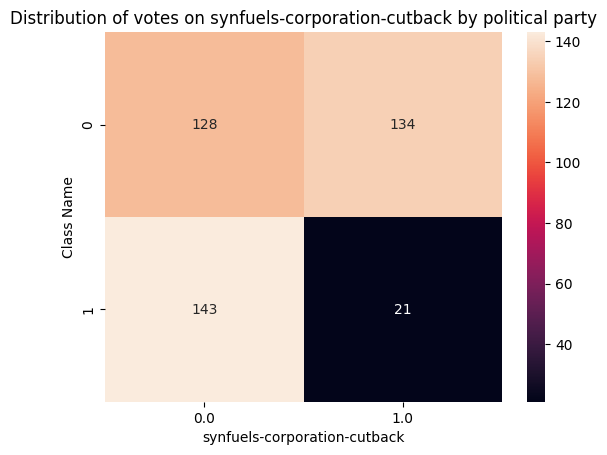

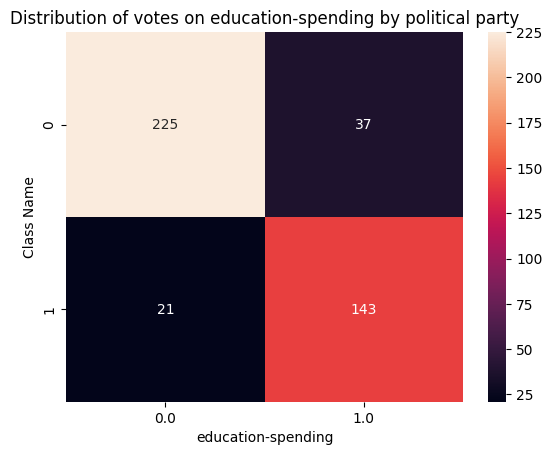

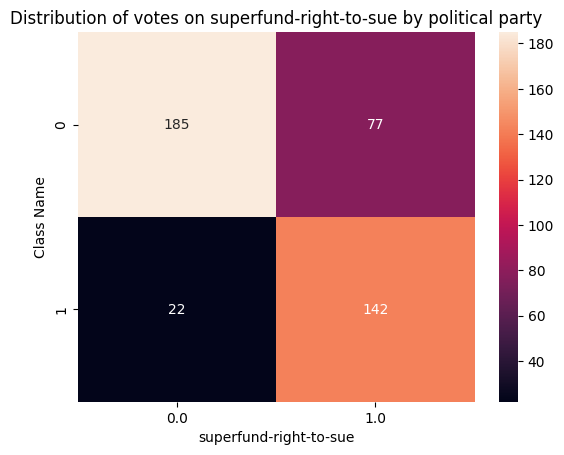

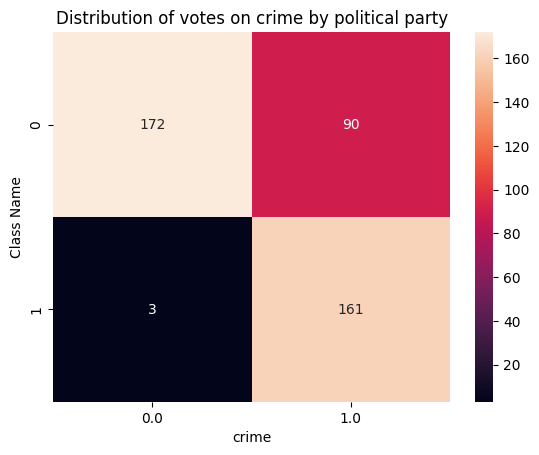

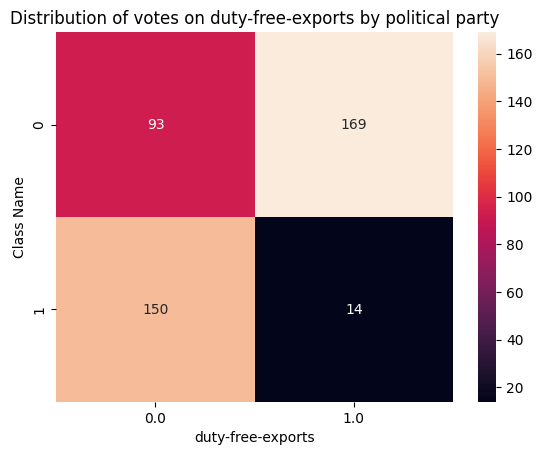

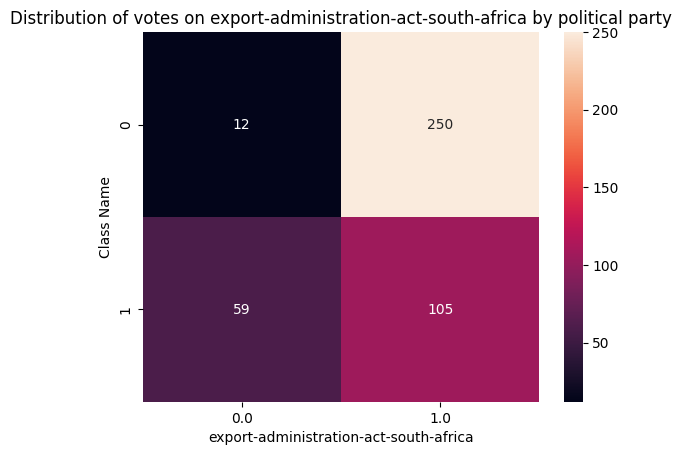

In [11]:
for column in clean_df.columns:
  if column == 'Class Name':
    continue

  sns.heatmap(pd.crosstab(clean_df['Class Name'], clean_df[column]), annot=True, fmt='d')
  plt.title(f"Distribution of votes on {column} by political party")
  plt.show()
  print()

Let's separate X and y:

In [12]:
X = clean_df.drop(['Class Name'], axis='columns').astype(int)
y = clean_df['Class Name']

Let's remove the unimportant features using the distribution graphs and the correlation table between the target and the features:

physician-fee-freeze                      0.918813
education-spending                        0.719823
el-salvador-aid                           0.702912
crime                                     0.631205
superfund-right-to-sue                    0.556841
religious-groups-in-schools               0.424613
immigration                               0.089060
water-project-cost-sharing                0.034880
synfuels-corporation-cutback             -0.387772
handicapped-infants                      -0.395797
export-administration-act-south-africa   -0.409917
anti-satellite-test-ban                  -0.519362
duty-free-exports                        -0.550146
mx-missile                               -0.615308
aid-to-nicaraguan-contras                -0.649957
adoption-of-the-budget-resolution        -0.739789
dtype: float64


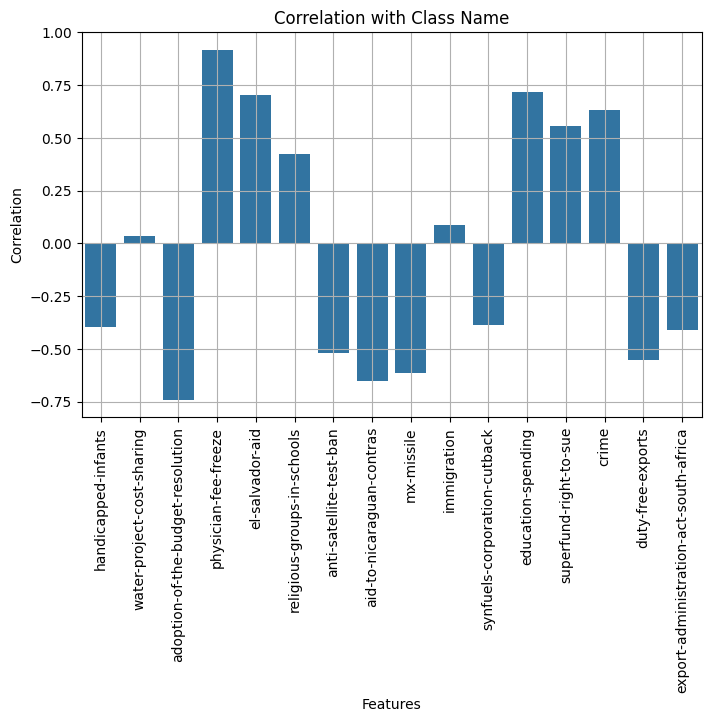

In [13]:
correlation = X.corrwith(y)

print(correlation.sort_values(ascending=False))

plt.figure(figsize=(8, 5))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.title("Correlation with Class Name")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.grid()
plt.show()


We can conclude that the columns 'water-project-cost-sharing', 'immigration' are not very important:

In [14]:
X.drop(['water-project-cost-sharing', 'immigration'], axis='columns', inplace=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

### 5. Creating the model

1. Create your model using alteast one hidden layer.

*hint: do not create too complex models, this is a very simple task, so it would be enought to use just few neurons in the hidden layers*

3. Compile the model, choose a suitable loss function, choose gradient to descend optimizer and specify the learning rate, and choose accuracy as our metric

4. Train the model. Specify the number of epochs and batch size. Now is the time to create a validation dataset. Set 20% of dataset to be a validation dataset

In [32]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='sigmoid'),
    Dense(8, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4277 - loss: 0.7451 - val_accuracy: 0.4412 - val_loss: 0.7185
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3685 - loss: 0.7278 - val_accuracy: 0.4412 - val_loss: 0.6946
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4897 - loss: 0.6934 - val_accuracy: 0.5588 - val_loss: 0.6782
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6215 - loss: 0.6713 - val_accuracy: 0.5588 - val_loss: 0.6671
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6377 - loss: 0.6501 - val_accuracy: 0.5588 - val_loss: 0.6588
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6199 - loss: 0.6427 - val_accuracy: 0.5588 - val_loss: 0.6518
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6564 - loss: 0.6201 - val_accuracy: 0.5588 - val_loss: 0.6444
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6442 - loss: 0.6124 - val_accuracy: 0.5588 - val_loss

2. Check what *model.summary()* does

In [33]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 16)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 772 (3.02 KB)

### 7. Model Evaluation



1. First, apply the same preprocessing you did to train set to test set also

In [ ]:
# already done above

2. Evaluate the model, print final accuracy and loss

In [34]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9845 - loss: 0.1383

Test Accuracy: 0.9767


3. Plot loss and validation loss depending on the training epochs into one graph. In another graph, plot accuracy and validation accuracy

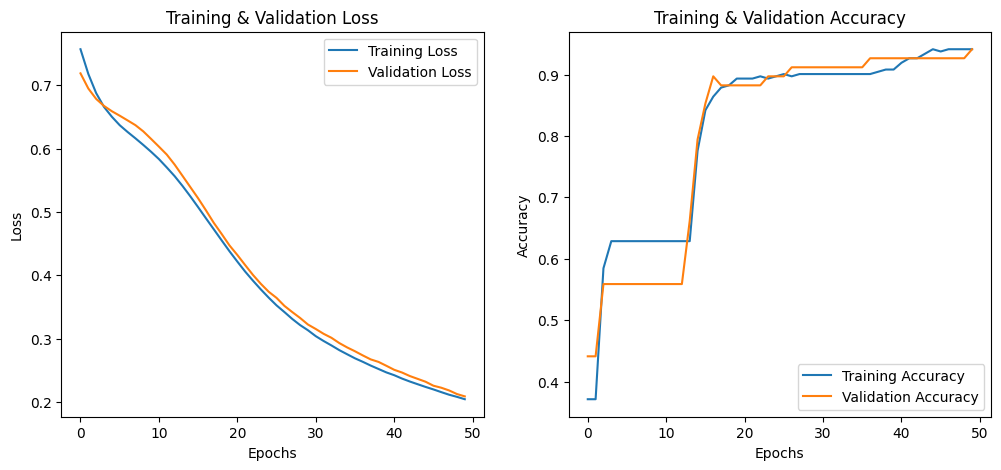

In [35]:
history_dict = history.history

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()
